<a href="https://colab.research.google.com/github/RajeshworM/Yield_Modelling_Automation/blob/main/district_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving forScatter.csv to forScatter.csv


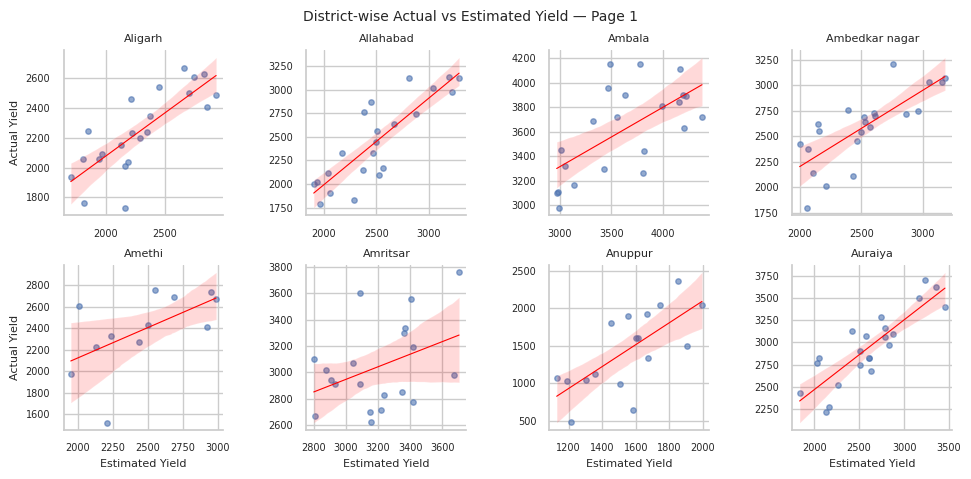

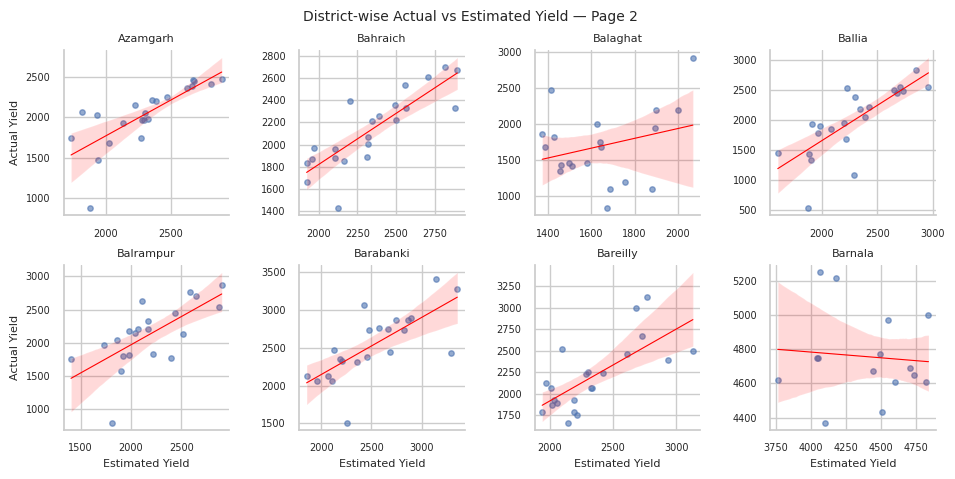

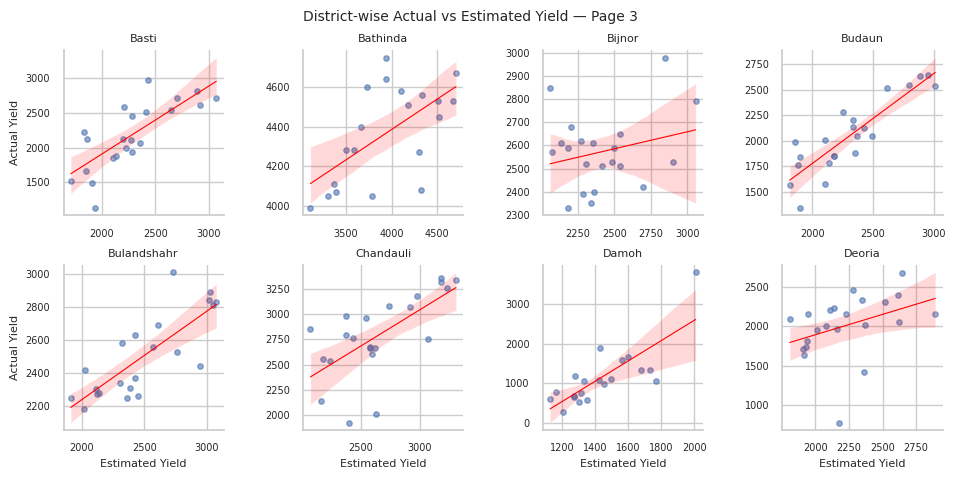

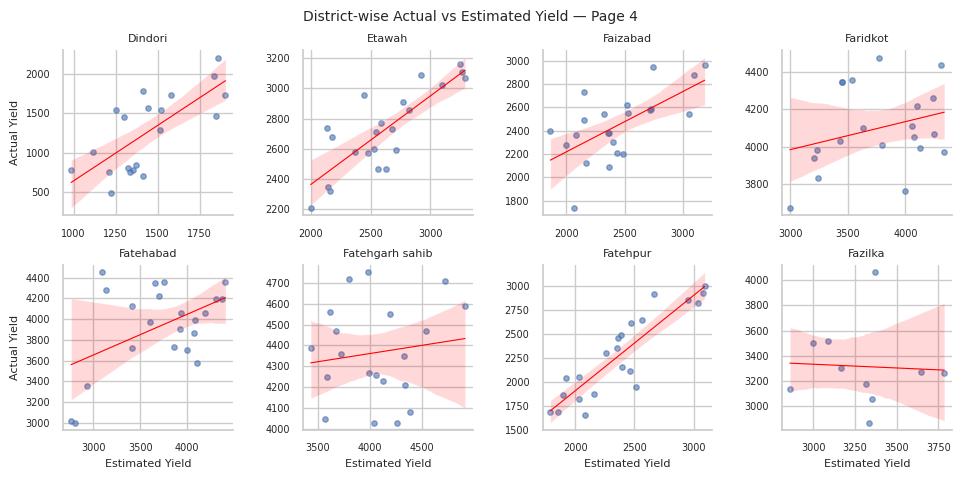

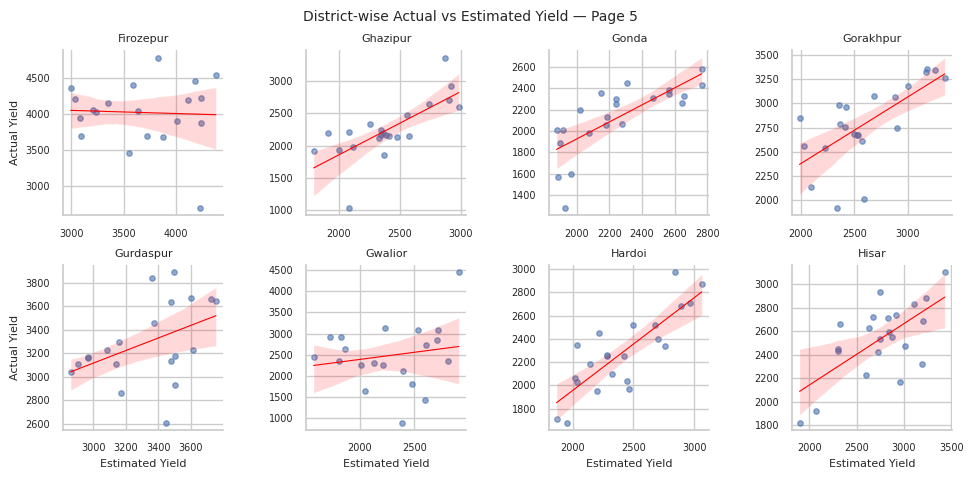

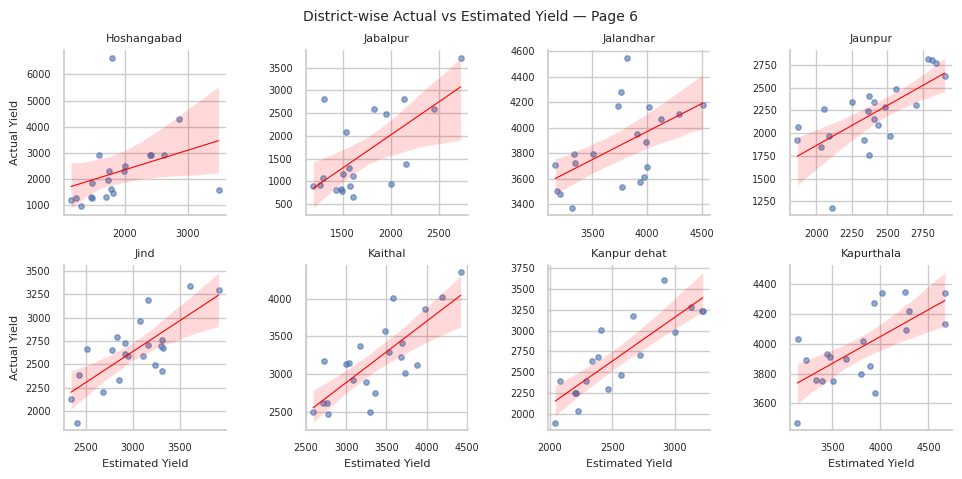

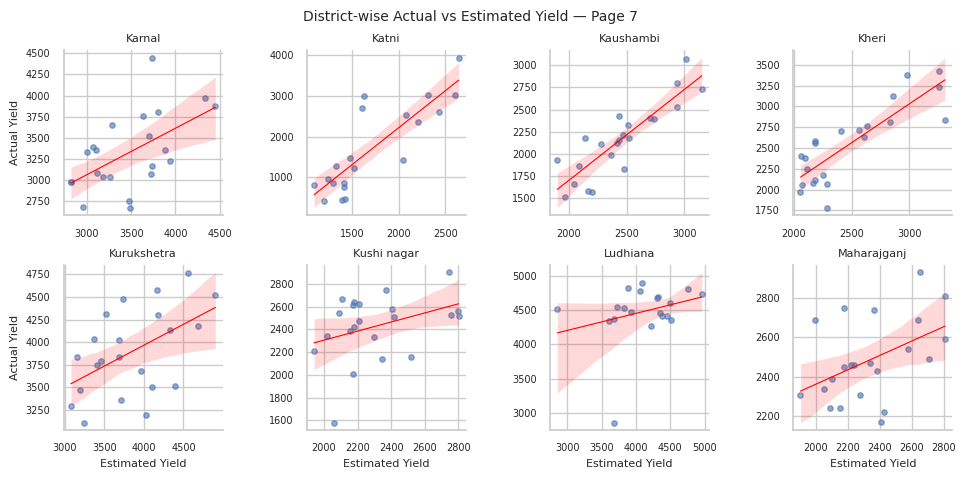

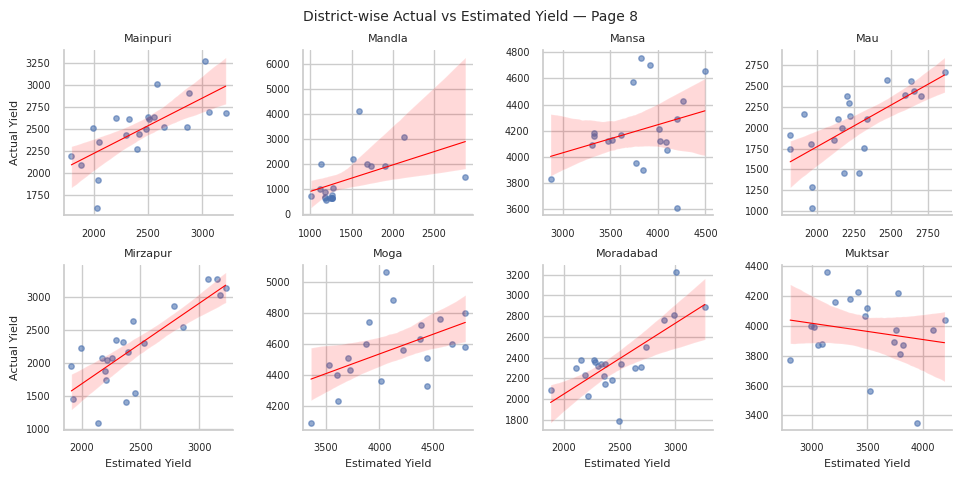

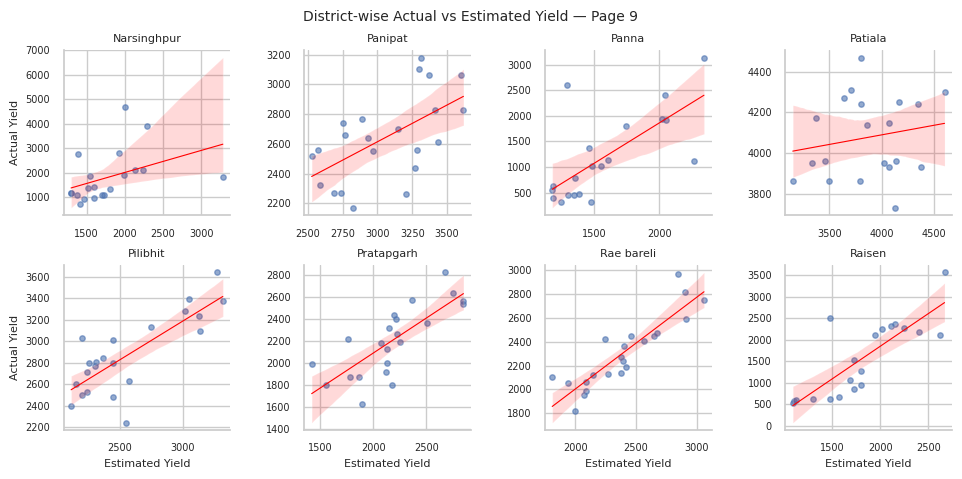

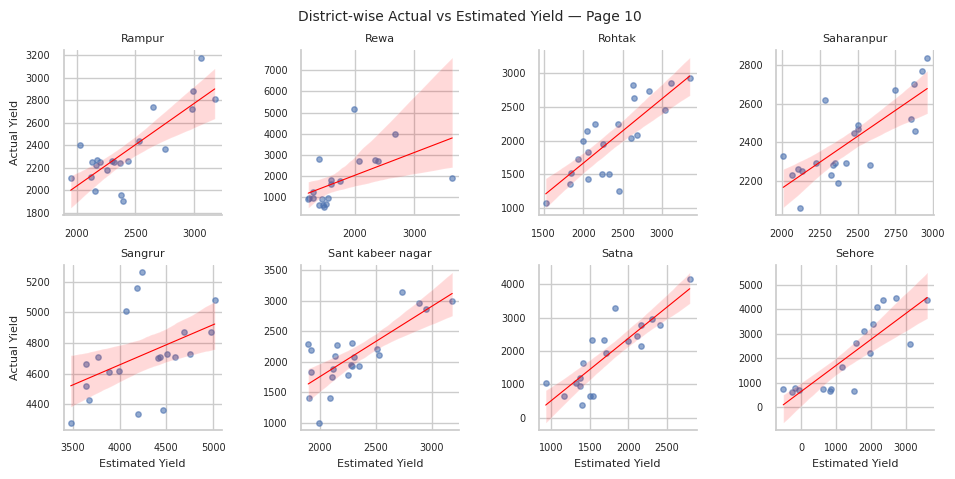

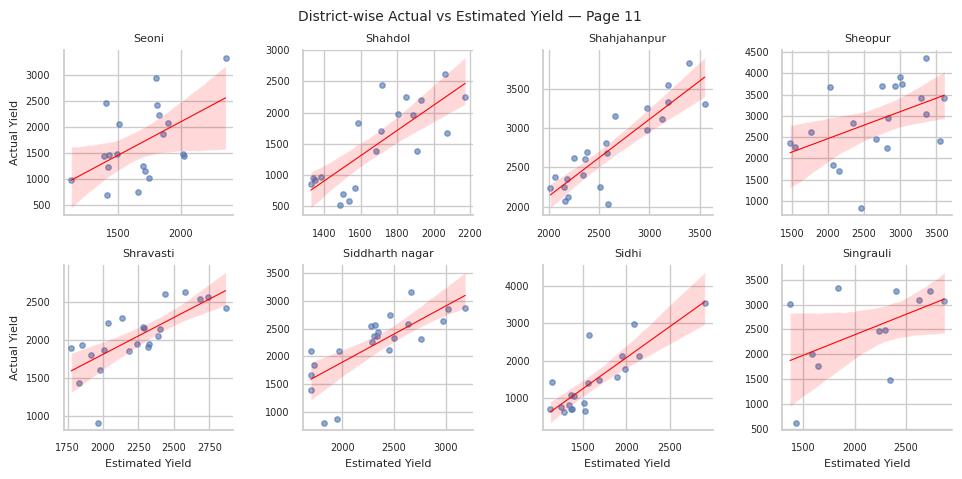

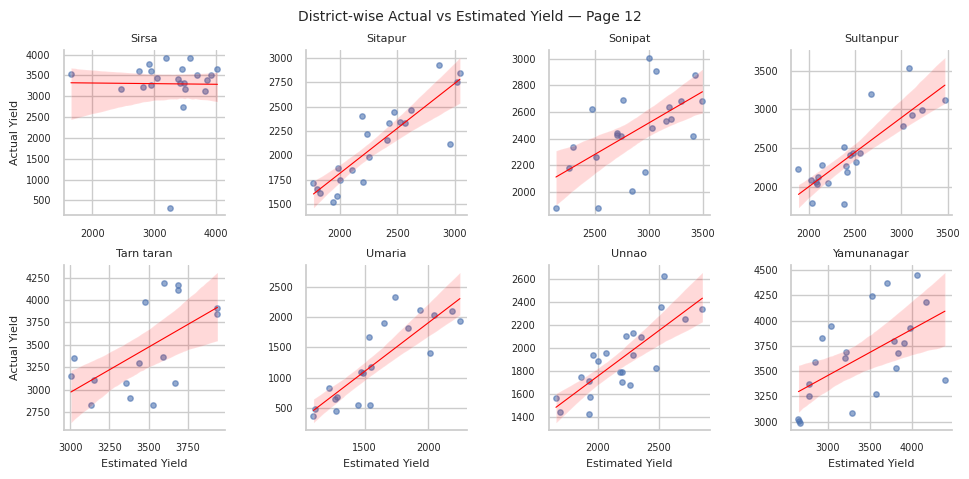

In [1]:
# 1️⃣ Upload your CSV
from google.colab import files
uploaded = files.upload()

# 2️⃣ Read your CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv(list(uploaded.keys())[0])

# 3️⃣ Prepare small font theme
sns.set_theme(style="whitegrid", context="notebook")

# Get unique districts
districts_list = df["districts"].unique()

# Function to split list into chunks of size n
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# 4️⃣ Create separate pages with 8 districts each
for i, group in enumerate(chunks(districts_list, 8), start=1):
    subset = df[df["districts"].isin(group)]

    g = sns.FacetGrid(
        subset,
        col="districts",
        col_wrap=4,      # 4 columns → 2 rows → 8 plots
        height=2.5,
        sharex=False,
        sharey=False
    )
    g.map_dataframe(
        sns.regplot,
        x="Estimated",
        y="Actual",
        scatter_kws={"alpha":0.6, "s":15},  # small dots
        line_kws={"color":"red", "lw":0.8}  # thin line
    )

    g.set_titles(col_template="{col_name}", size=8)
    g.set_axis_labels("Estimated Yield", "Actual Yield", fontsize=8)

    for ax in g.axes.flatten():
        ax.tick_params(axis='both', labelsize=7)

    plt.subplots_adjust(top=0.9, hspace=0.3)
    g.fig.suptitle(f"District-wise Actual vs Estimated Yield — Page {i}", fontsize=10)

    plt.show()


/tmp/ipython-input-4131208401.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_table = df_filtered.groupby("districts").apply(rmse_percent).reset_index()
/tmp/ipython-input-4131208401.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_table.sort_values("RMSE (%)", ascending=False),


             District    RMSE (%)
0             Aligarh   10.474511
1           Allahabad   10.406824
2              Ambala    9.907232
3      Ambedkar nagar    9.909331
4              Amethi   16.812668
5            Amritsar   12.496453
6             Anuppur   55.364421
7             Auraiya   13.790487
8            Azamgarh   28.325060
9            Bahraich   15.200548
10           Balaghat   35.325517
11             Ballia   59.943913
12          Balrampur   31.393377
13          Barabanki   14.992638
14           Bareilly   14.630865
15            Barnala   11.213456
16              Basti   19.839939
17           Bathinda   13.145081
18             Bijnor   11.861915
19             Budaun   17.485680
20        Bulandshahr    9.043951
21          Chandauli   13.596342
22              Damoh   95.362462
23             Deoria   42.717504
24            Dindori   53.756725
25             Etawah    8.927928
26           Faizabad   11.567443
27           Faridkot   12.801678
28          Fa

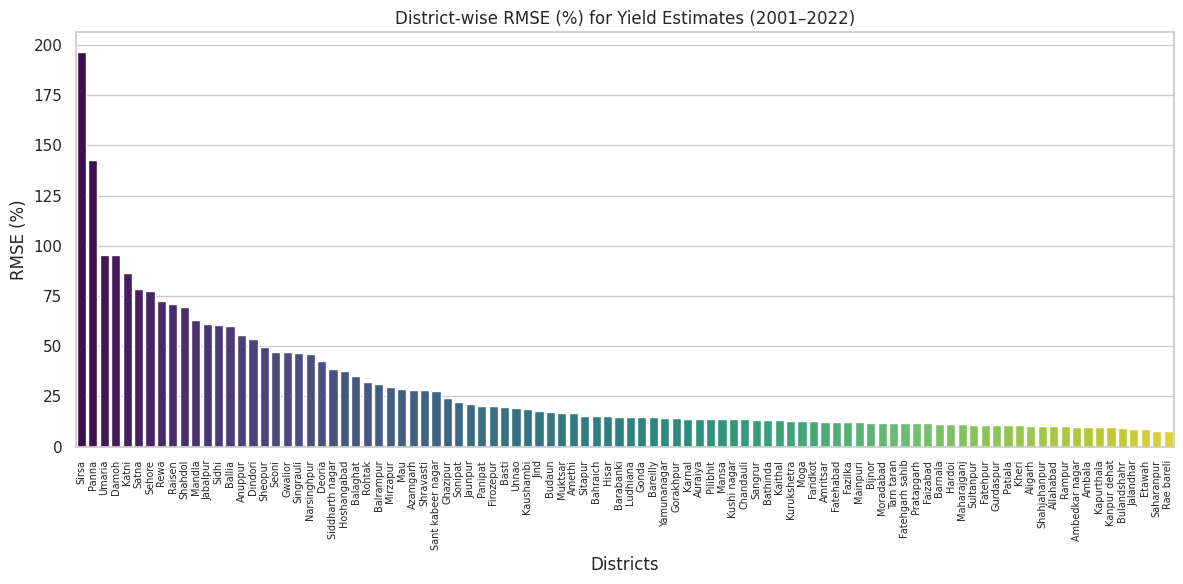

In [2]:
# --- RMSE (%) Calculation ---
import numpy as np

# Ensure year filter
df_filtered = df[(df["year"] >= 2001) & (df["year"] <= 2022)].copy()

# Function to compute RMSE (%)
def rmse_percent(x):
    errors = ((x["Estimated"] - x["Actual"]) / x["Actual"]) ** 2
    return np.sqrt(errors.mean()) * 100

# Group by district and calculate RMSE%
rmse_table = df_filtered.groupby("districts").apply(rmse_percent).reset_index()
rmse_table.columns = ["District", "RMSE (%)"]

# --- Show table ---
import pandas as pd
pd.set_option("display.max_rows", None)  # so all 96 districts show
print(rmse_table)

# --- Optional: save table to CSV ---
rmse_table.to_csv("districtwise_RMSE.csv", index=False)

# --- Graphical representation ---
plt.figure(figsize=(12,6))
sns.barplot(data=rmse_table.sort_values("RMSE (%)", ascending=False),
            x="District", y="RMSE (%)", palette="viridis")
plt.xticks(rotation=90, fontsize=7)
plt.title("District-wise RMSE (%) for Yield Estimates (2001–2022)", fontsize=12)
plt.ylabel("RMSE (%)")
plt.xlabel("Districts")
plt.tight_layout()
plt.show()
